<a href="https://colab.research.google.com/github/jahnavimidde/VsemML/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [3]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


/tmp/ipython-input-2008257877.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


In [4]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
print(df.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [5]:
from  sklearn.model_selection import train_test_split
X=df.drop('Dataset',axis=1)
y=df['Dataset']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier(random_state=42)
d.fit(X_train,y_train)
y_pred=d.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
# Accuracy: 0.6410256410256411
# Recall: 0.7241379310344828
# Precision: 0.7777777777777778
# F1 Score: 0.75


Accuracy: 0.717948717948718
Recall: 0.7586206896551724
Precision: 0.8461538461538461
F1 Score: 0.8


In [8]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=20,random_state=42)
r.fit(X_train,y_train)
y_pred=r.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


0.717948717948718
Recall: 0.8735632183908046
Precision: 0.7755102040816326
F1 Score: 0.8216216216216217


obseravtion:
single tree may give accuracy low ..but multiple trees can give accuracy high ....Recall and f1_score increaesed highly
n_estimators can change performance
like too less and too high number (10,70) lead to low accuracy


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from  sklearn.linear_model import LogisticRegression
L=LogisticRegression()
L.fit(X_train,y_train)
y_pred=L.predict(X_test)
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Recall: 0.9195402298850575
Precision: 0.7920792079207921
F1 Score: 0.851063829787234


In [15]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform both X_train and X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score

L = LogisticRegression()
L.fit(X_train, y_train)
y_pred = L.predict(X_test)

print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Recall: 0.9195402298850575
Precision: 0.7920792079207921
F1 Score: 0.851063829787234


In [18]:


from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define base estimators
estimators = []
estimators.append(('DecisionTree', d))
estimators.append(('RandomForest', r))
estimators.append(('LogisticRegression', L))

# Hard Voting Classifier

hard_voting = VotingClassifier(estimators=estimators, voting='hard')
hard_voting.fit(X_train, y_train)
y_pred_hard = hard_voting.predict(X_test)

print("\nHARD VOTING RESULTS ")
print("Accuracy:", accuracy_score(y_test, y_pred_hard))
print("Recall:", recall_score(y_test, y_pred_hard))
print("Precision:", precision_score(y_test, y_pred_hard))
print("F1 Score:", f1_score(y_test, y_pred_hard))

# ----------------------------
# Soft Voting Classifier
# ----------------------------
soft_voting = VotingClassifier(estimators=estimators, voting='soft')
soft_voting.fit(X_train, y_train)
y_pred_soft = soft_voting.predict(X_test)

print("\n SOFT VOTING RESULTS ")
print("Accuracy:", accuracy_score(y_test, y_pred_soft))
print("Recall:", recall_score(y_test, y_pred_soft))
print("Precision:", precision_score(y_test, y_pred_soft))
print("F1 Score:", f1_score(y_test, y_pred_soft))



HARD VOTING RESULTS 
Accuracy: 0.7350427350427351
Recall: 0.8620689655172413
Precision: 0.7978723404255319
F1 Score: 0.8287292817679558

 SOFT VOTING RESULTS 
Accuracy: 0.7435897435897436
Recall: 0.8045977011494253
Precision: 0.8433734939759037
F1 Score: 0.8235294117647058


In [20]:

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=50, random_state=42)
lr = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Individual predictions
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)
pred_lr = lr.predict(X_test)


In [22]:
# ======================================================
# 2. Implementing Simple Ensemble Techniques
# ======================================================

# 1️⃣ MAX VOTING
predictions = np.array([pred_dt, pred_rf, pred_lr])
max_voting = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

print("MAX VOTING RESULTS")
print("Accuracy:", accuracy_score(y_test, max_voting))
print("Recall:", recall_score(y_test, max_voting))
print("Precision:", precision_score(y_test, max_voting))
print("F1 Score:", f1_score(y_test, max_voting))

# 2️⃣ AVERAGE VOTING
prob_dt = dt.predict_proba(X_test)
prob_rf = rf.predict_proba(X_test)
prob_lr = lr.predict_proba(X_test)

avg_prob = (prob_dt + prob_rf + prob_lr) / 3
avg_voting = np.argmax(avg_prob, axis=1) + 1

print("AVERAGE VOTING RESULTS ")
print("Accuracy:", accuracy_score(y_test, avg_voting))
print("Recall:", recall_score(y_test, avg_voting))
print("Precision:", precision_score(y_test, avg_voting))
print("F1 Score:", f1_score(y_test, avg_voting))

# 3️⃣ WEIGHTED AVERAGE VOTING
acc_dt = accuracy_score(y_test, pred_dt)
acc_rf = accuracy_score(y_test, pred_rf)
acc_lr = accuracy_score(y_test, pred_lr)

weights = np.array([acc_dt, acc_rf, acc_lr])
weighted_prob = (prob_dt * weights[0] + prob_rf * weights[1] + prob_lr * weights[2]) / weights.sum()
weighted_voting = np.argmax(weighted_prob, axis=1) + 1

print(" WEIGHTED AVERAGE VOTING RESULTS")
print("Accuracy:", accuracy_score(y_test, weighted_voting))
print("Recall:", recall_score(y_test, weighted_voting))
print("Precision:", precision_score(y_test, weighted_voting))
print("F1 Score:", f1_score(y_test, weighted_voting))


MAX VOTING RESULTS
Accuracy: 0.7521367521367521
Recall: 0.8735632183908046
Precision: 0.8085106382978723
F1 Score: 0.8397790055248618
AVERAGE VOTING RESULTS 
Accuracy: 0.7435897435897436
Recall: 0.8045977011494253
Precision: 0.8433734939759037
F1 Score: 0.8235294117647058
 WEIGHTED AVERAGE VOTING RESULTS
Accuracy: 0.7435897435897436
Recall: 0.8045977011494253
Precision: 0.8433734939759037
F1 Score: 0.8235294117647058


In [23]:
# Experiment 1: Default Random Forest
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)
y_pred1 = rf1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)

# Experiment 2: Increase number of estimators
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)

# Experiment 3: Limit max depth
rf3 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf3.fit(X_train, y_train)
y_pred3 = rf3.predict(X_test)
acc3 = accuracy_score(y_test, y_pred3)

# Display results
print("Random Forest Bagging Results:")
print(f"Default RF Accuracy:       {acc1:.3f}")
print(f"RF with 100 Estimators:    {acc2:.3f}")
print(f"RF with max_depth=3:       {acc3:.3f}")


Random Forest Bagging Results:
Default RF Accuracy:       0.726
RF with 100 Estimators:    0.726
RF with max_depth=3:       0.778


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize RandomForestRegressor with OOB
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    oob_score=True,
    bootstrap=True
)

# Fit the model
rf_reg.fit(X_train, y_train)

# Predictions
y_pred = rf_reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
oob_score = rf_reg.oob_score_

print(f"MSE: {mse:.3f}")
print(f"R2 Score: {r2:.3f}")
print(f"OOB Score: {oob_score:.3f}")


MSE: 0.159
R2 Score: 0.168
OOB Score: 0.074


In [27]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [33]:
# Task 6: Boosting techniques (self-contained)

# Import libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Try to import XGBoost and CatBoost
try:
    from xgboost import XGBClassifier
    xgboost_available = True
except ImportError:
    xgboost_available = False
    print("XGBoost not installed. Skipping XGBoost model.")

try:
    from catboost import CatBoostClassifier
    catboost_available = True
except ImportError:
    catboost_available = False
    print("CatBoost not installed. Skipping CatBoost model.")

# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

# XGBoost (if available)
if xgboost_available:
    xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False,
                        eval_metric='logloss', random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# CatBoost (if available)
if catboost_available:
    cat = CatBoostClassifier(n_estimators=100, learning_rate=0.1, verbose=0, random_state=42)
    cat.fit(X_train, y_train)
    y_pred_cat = cat.predict(X_test)
    print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))


AdaBoost Accuracy: 0.9649122807017544
Gradient Boosting Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:48:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.956140350877193
CatBoost Accuracy: 0.9649122807017544


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:54:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Comparative Study of Ensemble Models:
                   Accuracy  Training Time (s)
Random Forest      0.964912           0.853319
AdaBoost           0.964912           0.588710
CatBoost           0.964912           2.007908
Bagging            0.956140           1.658810
Gradient Boosting  0.956140           1.739142
XGBoost            0.956140           0.560398


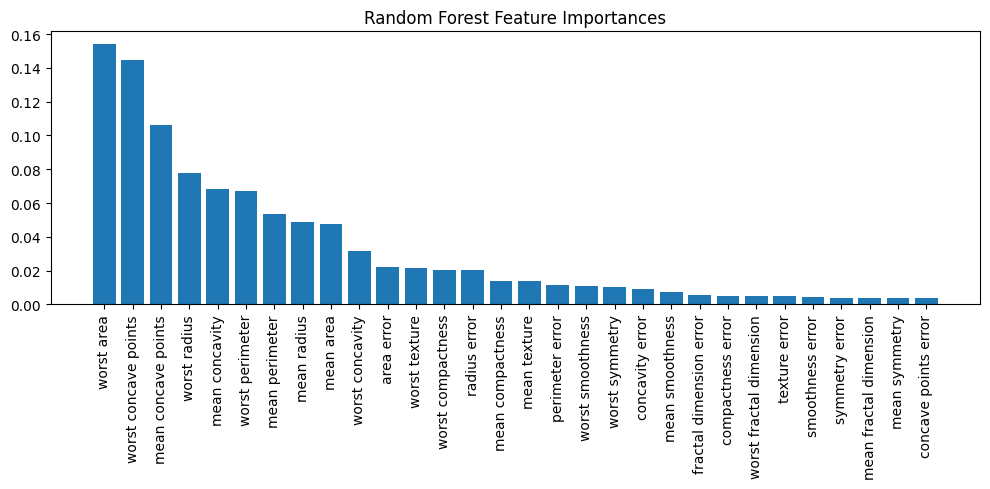


Accuracy with missing data: 0.9649122807017544

Heterogeneous Hard Voting Accuracy: 0.9736842105263158
Heterogeneous Soft Voting Accuracy: 0.9736842105263158

Homogeneous vs Heterogeneous Ensembles Summary:
               Ensemble Type  Accuracy
0                    Bagging  0.956140
1              Random Forest  0.964912
2                   AdaBoost  0.964912
3          Gradient Boosting  0.956140
4                    XGBoost  0.956140
5                   CatBoost  0.964912
6  Heterogeneous Hard Voting  0.973684
7  Heterogeneous Soft Voting  0.973684


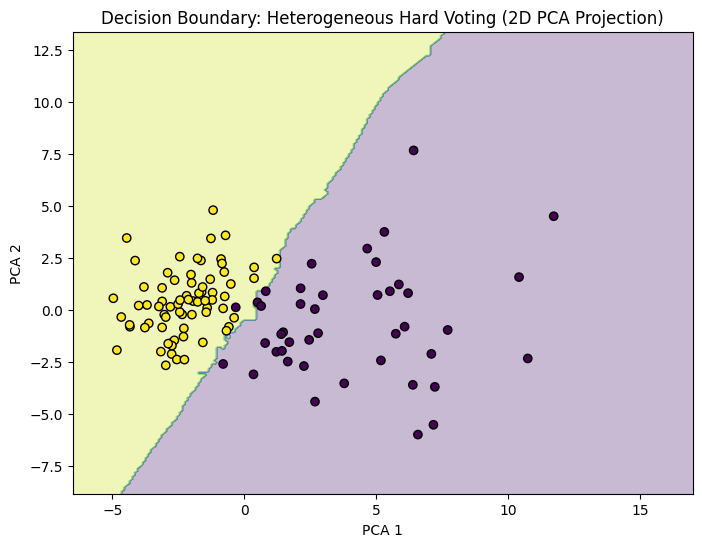

In [38]:
# =============================
# Tasks 7-10: Ensemble Study with Scaling and Visualization
# =============================

# -----------------------------
# Imports
# -----------------------------
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Optional Boosting Libraries
try:
    from xgboost import XGBClassifier
    xgboost_available = True
except ImportError:
    xgboost_available = False
    print("XGBoost not installed. Skipping XGBoost model.")

try:
    from catboost import CatBoostClassifier
    catboost_available = True
except ImportError:
    catboost_available = False
    print("CatBoost not installed. Skipping CatBoost model.")

# -----------------------------
# Load Dataset
# -----------------------------
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Feature Scaling to fix LR warning
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# Task 7: Comparative Study of Ensembles
# -----------------------------
results = {}

# Bagging
start = time.time()
bag = BaggingClassifier(n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
results['Bagging'] = (accuracy_score(y_test, bag.predict(X_test)), time.time() - start)

# Random Forest
start = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
results['Random Forest'] = (accuracy_score(y_test, rf.predict(X_test)), time.time() - start)

# AdaBoost
start = time.time()
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
results['AdaBoost'] = (accuracy_score(y_test, ada.predict(X_test)), time.time() - start)

# Gradient Boosting
start = time.time()
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
results['Gradient Boosting'] = (accuracy_score(y_test, gb.predict(X_test)), time.time() - start)

# XGBoost
if xgboost_available:
    start = time.time()
    xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb.fit(X_train, y_train)
    results['XGBoost'] = (accuracy_score(y_test, xgb.predict(X_test)), time.time() - start)

# CatBoost
if catboost_available:
    start = time.time()
    cat = CatBoostClassifier(n_estimators=100, learning_rate=0.1, verbose=0, random_state=42)
    cat.fit(X_train, y_train)
    results['CatBoost'] = (accuracy_score(y_test, cat.predict(X_test)), time.time() - start)

# Comparative Table
df_results = pd.DataFrame(results).T
df_results.columns = ['Accuracy', 'Training Time (s)']
print("\nComparative Study of Ensemble Models:")
print(df_results.sort_values(by='Accuracy', ascending=False))

# -----------------------------
# Task 8: Feature Importance & Robustness
# -----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Plot
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(data.feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()

# Introduce missing values in half of the first column rows
X_test_missing = X_test.copy()
n_rows = X_test_missing.shape[0]
X_test_missing[:n_rows//2, 0] = np.nan

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_test_missing = imputer.fit_transform(X_test_missing)

y_pred_missing = rf.predict(X_test_missing)
print("\nAccuracy with missing data:", accuracy_score(y_test, y_pred_missing))

# -----------------------------
# Task 9: Heterogeneous Ensemble
# -----------------------------
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression(max_iter=1000)),
    ('svc', SVC(probability=True))
]

# Hard Voting
hard_voting = VotingClassifier(estimators=estimators, voting='hard')
hard_voting.fit(X_train, y_train)
y_pred_hard = hard_voting.predict(X_test)
print("\nHeterogeneous Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))

# Soft Voting
soft_voting = VotingClassifier(estimators=estimators, voting='soft')
soft_voting.fit(X_train, y_train)
y_pred_soft = soft_voting.predict(X_test)
print("Heterogeneous Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))

# -----------------------------
# Task 10: Homogeneous vs Heterogeneous Summary
# -----------------------------
summary = pd.DataFrame({
    'Ensemble Type': ['Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting',
                      'XGBoost' if xgboost_available else None,
                      'CatBoost' if catboost_available else None,
                      'Heterogeneous Hard Voting', 'Heterogeneous Soft Voting'],
    'Accuracy': [results['Bagging'][0], results['Random Forest'][0], results['AdaBoost'][0], results['Gradient Boosting'][0],
                 results['XGBoost'][0] if xgboost_available else None,
                 results['CatBoost'][0] if catboost_available else None,
                 accuracy_score(y_test, y_pred_hard), accuracy_score(y_test, y_pred_soft)]
})
summary = summary.dropna().reset_index(drop=True)
print("\nHomogeneous vs Heterogeneous Ensembles Summary:")
print(summary)

# -----------------------------
# Optional: Visualize Decision Boundaries (2D PCA Projection)
# -----------------------------
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Fit a simple heterogeneous hard voting on 2D data for visualization
hard_voting_2d = VotingClassifier(estimators=estimators, voting='hard')
hard_voting_2d.fit(X_train_2d, y_train)

# Meshgrid for plotting
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = hard_voting_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test_2d[:,0], X_test_2d[:,1], c=y_test, edgecolor='k')
plt.title("Decision Boundary: Heterogeneous Hard Voting (2D PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
